In [1]:
# Import all necessary libraries and functions.
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed = 42
np.random.seed(seed)

### Carregando a base de dados dos dígitos escritos à mão

In [3]:
X, y = load_digits(return_X_y=True)

### Plotando as 10 primeiras images da base de dados

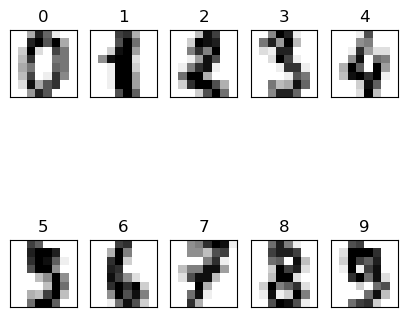

In [4]:
plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.binary)
    plt.title(str(i))
plt.show()

### Encontrando os melhores hiperparâmetros

In [5]:
# Dictionary with the hyperparameters to be checked. 
parameters = {
    'hidden_layer_sizes':[(10,), (20,), (30,), (40,)],
    'activation' : ['logistic', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam']    
}

# Instantiate MLPClassifier.
clf = MLPClassifier(max_iter=10000, random_state=seed)

# Instantiate GridSearchCV.
gs = GridSearchCV(clf, parameters, scoring='accuracy', verbose=4, cv=10)

# Train the MLP regressor with grid search.
gs.fit(X, y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.883 total time=   3.4s
[CV 2/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.906 total time=   2.9s
[CV 3/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.861 total time=   3.0s
[CV 4/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.778 total time=   4.6s
[CV 5/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.872 total time=   2.7s
[CV 6/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.917 total time=   4.2s
[CV 7/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.928 total time=   1.9s
[CV 8/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.911 total time=   3.0s
[CV 9/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score

[CV 8/10] END activation=logistic, hidden_layer_sizes=(30,), solver=sgd;, score=0.978 total time=   2.5s
[CV 9/10] END activation=logistic, hidden_layer_sizes=(30,), solver=sgd;, score=0.899 total time=   3.3s
[CV 10/10] END activation=logistic, hidden_layer_sizes=(30,), solver=sgd;, score=0.933 total time=   3.1s
[CV 1/10] END activation=logistic, hidden_layer_sizes=(30,), solver=adam;, score=0.922 total time=   1.4s
[CV 2/10] END activation=logistic, hidden_layer_sizes=(30,), solver=adam;, score=0.972 total time=   1.5s
[CV 3/10] END activation=logistic, hidden_layer_sizes=(30,), solver=adam;, score=0.883 total time=   0.9s
[CV 4/10] END activation=logistic, hidden_layer_sizes=(30,), solver=adam;, score=0.900 total time=   0.9s
[CV 5/10] END activation=logistic, hidden_layer_sizes=(30,), solver=adam;, score=0.972 total time=   1.0s
[CV 6/10] END activation=logistic, hidden_layer_sizes=(30,), solver=adam;, score=0.950 total time=   0.9s
[CV 7/10] END activation=logistic, hidden_layer_

C:\Users\felipe.figueiredo\AppData\Local\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10] END activation=relu, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.821 total time=   9.8s
[CV 1/10] END activation=relu, hidden_layer_sizes=(10,), solver=sgd;, score=0.878 total time=   1.4s
[CV 2/10] END activation=relu, hidden_layer_sizes=(10,), solver=sgd;, score=0.922 total time=   0.8s
[CV 3/10] END activation=relu, hidden_layer_sizes=(10,), solver=sgd;, score=0.861 total time=   1.1s
[CV 4/10] END activation=relu, hidden_layer_sizes=(10,), solver=sgd;, score=0.900 total time=   1.1s
[CV 5/10] END activation=relu, hidden_layer_sizes=(10,), solver=sgd;, score=0.917 total time=   0.9s
[CV 6/10] END activation=relu, hidden_layer_sizes=(10,), solver=sgd;, score=0.956 total time=   1.0s
[CV 7/10] END activation=relu, hidden_layer_sizes=(10,), solver=sgd;, score=0.933 total time=   1.4s
[CV 8/10] END activation=relu, hidden_layer_sizes=(10,), solver=sgd;, score=0.922 total time=   0.7s
[CV 9/10] END activation=relu, hidden_layer_sizes=(10,), solver=sgd;, score=0.849 total 

[CV 3/10] END activation=relu, hidden_layer_sizes=(40,), solver=lbfgs;, score=0.906 total time=   0.0s
[CV 4/10] END activation=relu, hidden_layer_sizes=(40,), solver=lbfgs;, score=0.911 total time=   0.0s
[CV 5/10] END activation=relu, hidden_layer_sizes=(40,), solver=lbfgs;, score=0.956 total time=   0.0s
[CV 6/10] END activation=relu, hidden_layer_sizes=(40,), solver=lbfgs;, score=0.944 total time=   0.0s
[CV 7/10] END activation=relu, hidden_layer_sizes=(40,), solver=lbfgs;, score=0.972 total time=   0.0s
[CV 8/10] END activation=relu, hidden_layer_sizes=(40,), solver=lbfgs;, score=0.950 total time=   0.0s
[CV 9/10] END activation=relu, hidden_layer_sizes=(40,), solver=lbfgs;, score=0.899 total time=   0.0s
[CV 10/10] END activation=relu, hidden_layer_sizes=(40,), solver=lbfgs;, score=0.939 total time=   0.0s
[CV 1/10] END activation=relu, hidden_layer_sizes=(40,), solver=sgd;, score=0.922 total time=   0.7s
[CV 2/10] END activation=relu, hidden_layer_sizes=(40,), solver=sgd;, scor

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=10000, random_state=42),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(10,), (20,), (30,), (40,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=4)

### Melhores hiperparâmetros

In [6]:
print(gs.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': (40,), 'solver': 'adam'}


### Acurácia

In [7]:
y_pred = gs.predict(X)
        
acc = accuracy_score(y_pred, y)
print('Accuracy: ', acc)

Accuracy:  1.0


### Matriz de confusão

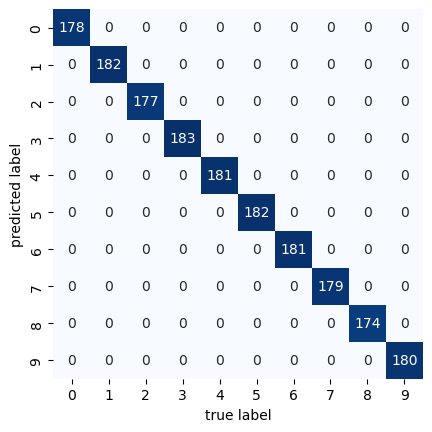

In [8]:
# Plot the confusion matrix.
numberOfClasses = 10
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()